###  BIG MART SALES PREDICTION

#### Big Mart is a big supermarket chain, having stores all around the country.The management wants to predict sales per product for each store. The shop has collected sales data of products accross 10 sroes in different cities over a given period of time.

#### Problem Statement : This is supervised machine learning problem with a target lebel as item_outlet_sales, we will be implementing regression techniques to design prediction model

#### BigMart Sale Analysis divided into below Categories
1. Exploratory data analysis (EDA);
2. Data Pre-processing;
3. Feature engineering;
4. Feature Transformation;
5. Modeling;
6. Hyperparameter tuning
7. Compare the Accuracy of the models.

#### Step 1: Exploratory data analysis (EDA);

#### Import all the required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the Dataset to Pandas DataFrame

In [129]:
df = pd.read_csv('C:\\Users\\Anup\\Desktop\\BigMart_DataSet\\Bigmart_Train.csv')

#### Display Random samples of Data set

In [75]:
# Display random samples
df.sample(5).style.set_table_styles(
    [{'selector': 'tr:hover',
      'props': [('background-color', 'grey')]}]
)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4756,FDV60,20.2,Regular,0.118025,Baking Goods,195.811,OUT017,2007,nan,Tier 2,Supermarket Type1,2553.34
6975,NCP50,17.35,Low Fat,0,Others,79.2618,OUT018,2009,Medium,Tier 3,Supermarket Type2,966.742
5688,FDI56,7.325,Low Fat,0.156308,Fruits and Vegetables,92.2146,OUT010,1998,nan,Tier 3,Grocery Store,91.2146
7535,FDI34,10.65,reg,0.0852683,Snack Foods,229.767,OUT049,1999,Medium,Tier 1,Supermarket Type1,3916.24
6939,FDV40,17.35,Low Fat,0.0147216,Frozen Foods,73.1038,OUT045,2002,nan,Tier 2,Supermarket Type1,886.846


#### Display top 5 observations

In [76]:
# Display top 5 observations
df.head(5).style.set_properties(**{'background-color': 'black',                                                   
                                    'color': 'lawngreen', 
                                    'border-color': 'white'})


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.0160473,Dairy,249.809,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.0192782,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.423
2,FDN15,17.5,Low Fat,0.0167601,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.2,Regular,0,Fruits and Vegetables,182.095,OUT010,1998,nan,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705


#### Display Last 5 observations

In [77]:
# Display Last 5 observations
df.tail(5).style.set_table_styles(
[{'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#eee')]}, 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 {'selector': 'th',
  'props': [('background', '#606060'), 
            ('color', 'white'),
            ('font-family', 'verdana')]},
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},
]
)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.0567834,Snack Foods,214.522,OUT013,1987,High,Tier 3,Supermarket Type1,2778.38
8519,FDS36,8.38,Regular,0.0469824,Baking Goods,108.157,OUT045,2002,nan,Tier 2,Supermarket Type1,549.285
8520,NCJ29,10.6,Low Fat,0.0351863,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.11
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.133,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.6
8522,DRG01,14.8,Low Fat,0.0448783,Soft Drinks,75.467,OUT046,1997,Small,Tier 1,Supermarket Type1,765.67


#### If we look at variable Item_Identifier , we can see different group of letters per each product such as ‘FD’ (Food), ‘DR’(Drinks) and ‘NC’ (Non-Consumable).

In [79]:
# Check the dimension of the dataset.
print("The train data set size is : {} ".format(df.shape))
print("Above DataSet contains {} rows and {} features or columns ".format(df.shape[0],df.shape[1]))

The train data set size is : (8523, 12) 
Above DataSet contains 8523 rows and 12 features or columns 


#### Display Feature Types and No. of non-null entries for each features

In [80]:
# Display Feature Types and No of non-null entries for each features
df.info()
print("\n*************************************** \n Item_Weight & Outlet_Size contains Null Values")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB

*************************************** 
 Item_Weight & Outlet_Size contains Null Values


#### Display Statistical Summary of Numeric Features

In [81]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


### Step 2: Data PreProcessing 

#### Check Null or Missing Values  

In [82]:
print(df.isnull().sum())
print("\n*************************************** \n Item_Weight & Outlet_Size contains Null Values")

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

*************************************** 
 Item_Weight & Outlet_Size contains Null Values


#### Check missing values ratio for the features

In [83]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
Outlet_Size,28.276428
Item_Weight,17.165317


#### Missing Ratio Tells for Outlet_Size feature approxmate 28% are Missing values and for Item_Weight approxmate 17% are missing values	 

Text(0.5,1,'Percent missing data by feature')

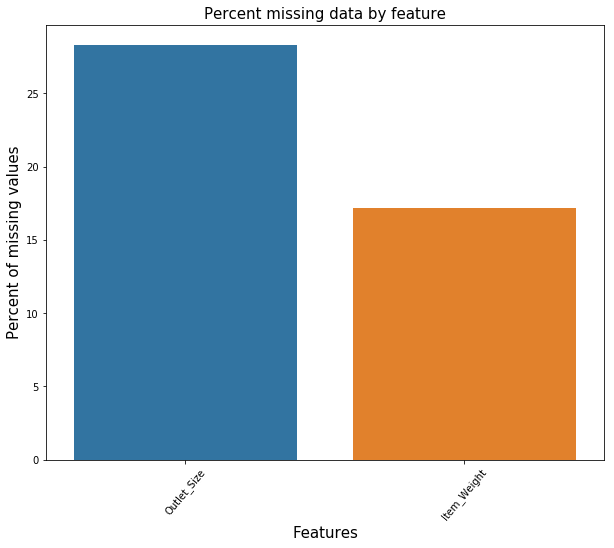

In [84]:
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='50')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### Univariate Analysis

#### Features having multiple class or levels, convert them to Category Type

In [86]:
# select all columns except float and integer based 
df.select_dtypes(exclude =['float64', 'int64']).dtypes 

Item_Identifier         category
Item_Fat_Content        category
Item_Type               category
Outlet_Identifier       category
Outlet_Size             category
Outlet_Location_Type    category
Outlet_Type             category
dtype: object

#### Check Feature Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018C9B2F8A90>,
      dtype=object)

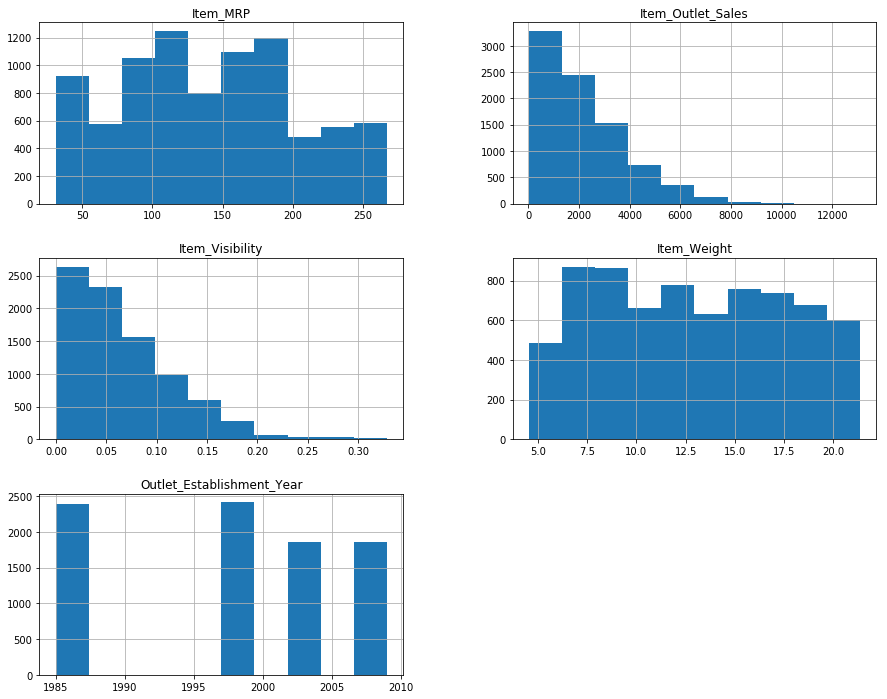

In [87]:
df.hist(figsize=(15,12))

#### Check total count of each class or level for all categorical features 

In [130]:
print("Categories and Count of each class in Item Fat Content:\n*************************\n{}".format(df.Item_Fat_Content.value_counts()))

Categories and Count of each class in Item Fat Content:
*************************
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


In [131]:
## LF, low fat belong to same category that is Low Fat and reg belong to Regular category so replacing LF, low fat and reg to thier category by
df.Item_Fat_Content=df.Item_Fat_Content.replace('LF','Low Fat')
df.Item_Fat_Content=df.Item_Fat_Content.replace('reg','Regular')
df.Item_Fat_Content=df.Item_Fat_Content.replace('low fat','Low Fat')

In [132]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [96]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

#### Display the counts of each items in Item_Type

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

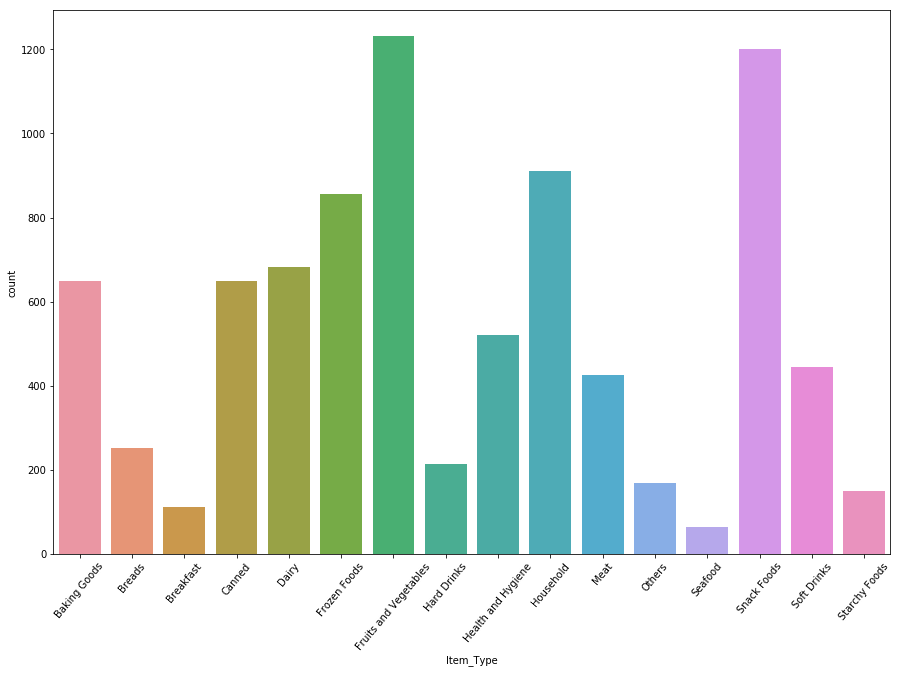

In [168]:
plt.figure(figsize=(15,10))
sns.countplot(df.Item_Type)
plt.xticks(rotation=50)

In [117]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

#### Distribution of Outlet Size

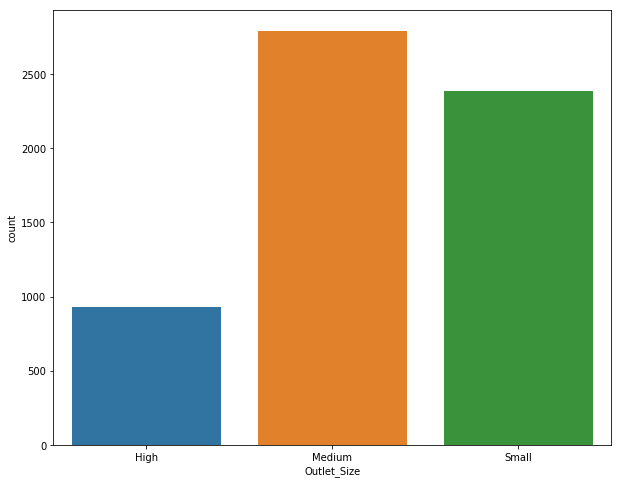

In [169]:
plt.figure(figsize=(10,8))
sns.countplot(df.Outlet_Size)

In [119]:
df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

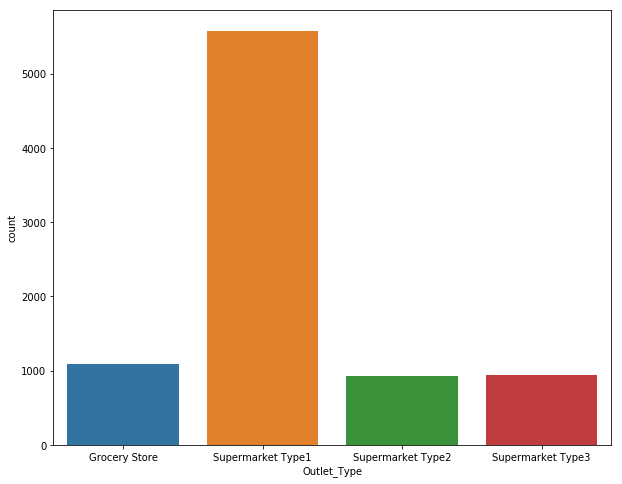

In [170]:
plt.figure(figsize=(10,8))
sns.countplot(df.Outlet_Type)

In [121]:
df.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

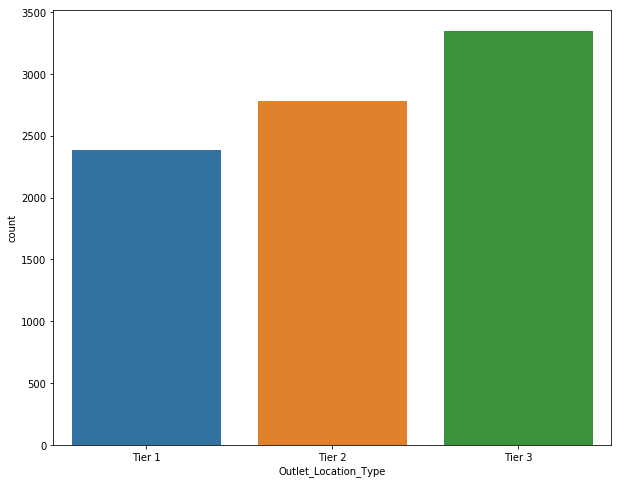

In [171]:
plt.figure(figsize=(10,8))
sns.countplot(df.Outlet_Location_Type)

In [133]:
df.groupby('Outlet_Location_Type').count()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
Outlet_Location_Type,,,,,,,,,,,
Tier 1,2388,1860,2388,2388,2388,2388,2388,2388,2388,2388,2388
Tier 2,2785,2785,2785,2785,2785,2785,2785,2785,930,2785,2785
Tier 3,3350,2415,3350,3350,3350,3350,3350,3350,2795,3350,3350


In [156]:
# group by Item_Type and Outlet_Type
grouped = df.groupby(['Item_Type', 'Outlet_Type']).agg({'Item_Outlet_Sales': ['mean', 'count']})
grouped = grouped.reset_index()
grouped

Item_Type        Outlet_Type Item_Outlet_Sales      
                                                          mean count
0            Baking Goods      Grocery Store        292.082544    85
1            Baking Goods  Supermarket Type1       2102.021249   426
2            Baking Goods  Supermarket Type2       1780.368782    68
3            Baking Goods  Supermarket Type3       3248.872417    69
4                  Breads      Grocery Store        381.967442    33
5                  Breads  Supermarket Type1       2346.928355   160
6                  Breads  Supermarket Type2       2022.404489    27
7                  Breads  Supermarket Type3       3565.122748    31
8               Breakfast      Grocery Store        412.831042    19
9               Breakfast  Supermarket Type1       2228.334688    68
10              Breakfast  Supermarket Type2       1874.670867    12
11              Breakfast  Supermarket Type3       4584.759327    11
12                 Canned      Grocery Store        352.864879    73
13                 Canned  Supermarket Type1       2348.732970   426
14                 Canned  Supermarket Type2       1867.714110    78
15                 Canned  Supermarket Type3       3779.866814    72
16                  Dairy      Grocery Store        341.866589    92
17                  Dairy  Supermarket Type1       2392.654389   450
18                  Dairy  Supermarket Type2       2083.981362    73
19                  Dairy  Supermarket Type3       3915.182245    67
20           Frozen Foods      Grocery Store        322.285984   103
21           Frozen Foods  Supermarket Type1       2259.909110   572
22           Frozen Foods  Supermarket Type2       1995.641420    92
23           Frozen Foods  Supermarket Type3       3553.621470    89
24  Fruits and Vegetables      Grocery Store        319.750450   152
25  Fruits and Vegetables  Supermarket Type1       2399.947642   805
26  Fruits and Vegetables  Supermarket Type2       1951.642279   135
27  Fruits and Vegetables  Supermarket Type3       4114.487061   140
28            Hard Drinks      Grocery Store        243.155708    24
29            Hard Drinks  Supermarket Type1       2231.408037   145
..                    ...                ...               ...   ...
34     Health and Hygiene  Supermarket Type2       1876.649134    58
35     Health and Hygiene  Supermarket Type3       3318.069783    60
36              Household      Grocery Store        367.286612   119
37              Household  Supermarket Type1       2407.403432   597
38              Household  Supermarket Type2       2065.970392    95
39              Household  Supermarket Type3       3821.207782    99
40                   Meat      Grocery Store        387.525864    66
41                   Meat  Supermarket Type1       2260.875454   257
42                   Meat  Supermarket Type2       2057.727270    46
43                   Meat  Supermarket Type3       3862.293911    56
44                 Others      Grocery Store        288.094126    27
45                 Others  Supermarket Type1       2244.418022   107
46                 Others  Supermarket Type2       1853.620490    20
47                 Others  Supermarket Type3       2700.928667    15
48                Seafood      Grocery Store        228.435980    10
49                Seafood  Supermarket Type1       2640.196610    40
50                Seafood  Supermarket Type2       3166.639914     7
51                Seafood  Supermarket Type3       2687.073686     7
52            Snack Foods      Grocery Store        353.398432   146
53            Snack Foods  Supermarket Type1       2406.862759   785
54            Snack Foods  Supermarket Type2       2111.473733   132
55            Snack Foods  Supermarket Type3       3745.168739   137
56            Soft Drinks      Grocery Store        343.602119    54
57            Soft Drinks  Supermarket Type1       2126.751624   300
58            Soft Drinks  Supermarket Type2       1923.814626    46
59            

In [155]:
# group by Item_Type and Outlet_Type and disply Item_Outlet_Sales count 
grp = df.groupby(['Outlet_Size', 'Outlet_Type']).agg({'Item_Outlet_Sales': 'count'})
grp = grp.reset_index()
grp

,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,High,Supermarket Type1,932
1,Medium,Supermarket Type1,930
2,Medium,Supermarket Type2,928
3,Medium,Supermarket Type3,935
4,Small,Grocery Store,528
5,Small,Supermarket Type1,1860


In [154]:
twowaytable=pd.crosstab(df['Outlet_Size'],df['Outlet_Type'])
twowaytable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [160]:
# group by Outlet_Size and Outlet_Location_Type and disply Item_Outlet_Sales count 
grpdata = df.groupby(['Outlet_Size', 'Outlet_Location_Type']).agg({'Item_Outlet_Sales': 'count'})
grpdata = grpdata.reset_index()
grpdata

,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,High,Tier 3,932
1,Medium,Tier 1,930
2,Medium,Tier 3,1863
3,Small,Tier 1,1458
4,Small,Tier 2,930


In [159]:
twowaytable=pd.crosstab(df['Outlet_Size'],df['Outlet_Location_Type'])
twowaytable

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


#### Display distribution of numeric features

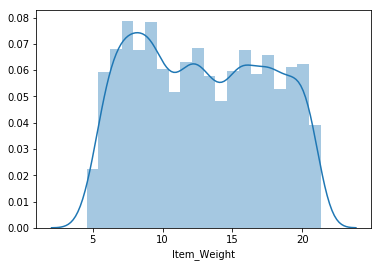

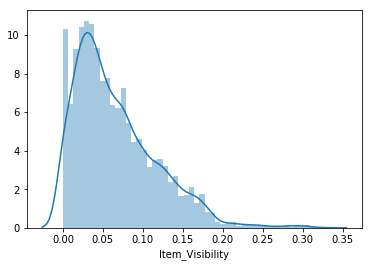

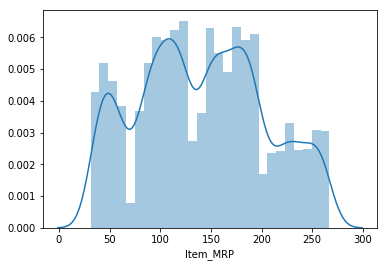

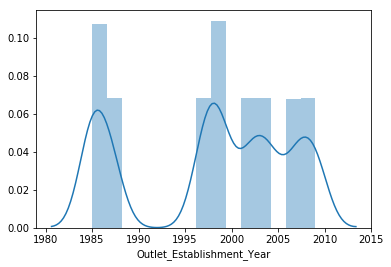

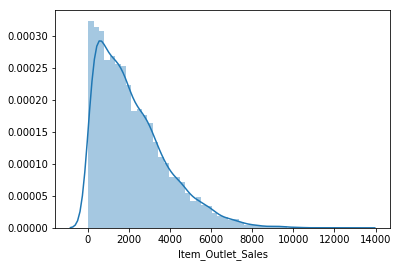

In [162]:
for i in df.describe().columns:
    sns.distplot(df[i].dropna())
    plt.show()

#### Display distribution of numeric features as Box Plot

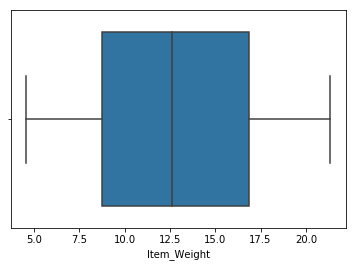

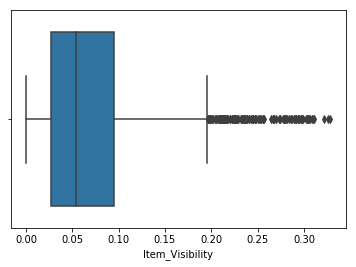

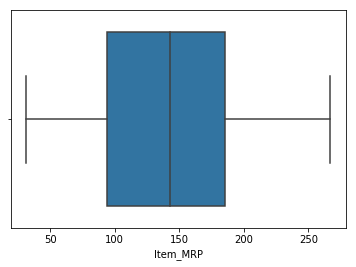

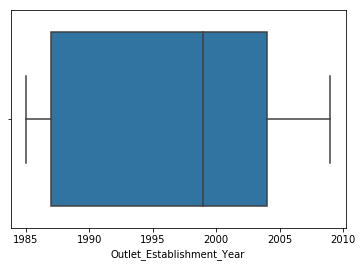

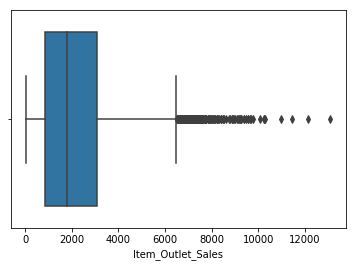

In [163]:
for i in df.describe().columns:
    sns.boxplot(df[i].dropna())
    plt.show()

### Bivariate Analysis

#### Need to understand the relationship between our target variable and predictors as well as the relationship among predictors.

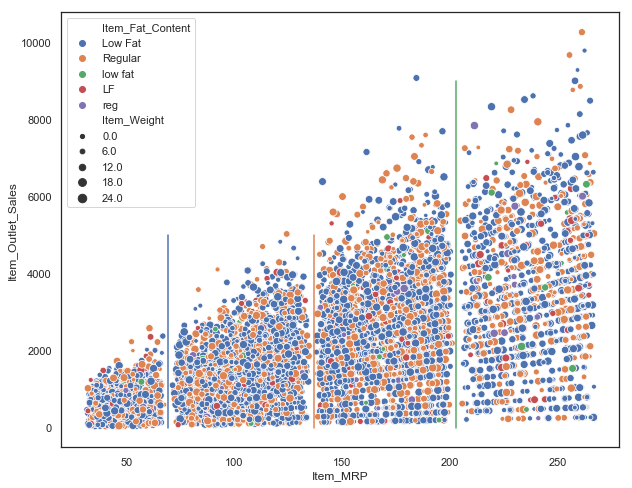

In [8]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=df)
plt.plot([69,69],[0,5000])
plt.plot([137,137],[0,5000])
plt.plot([203,203],[0,9000])

#### Item_Weight vs Item_Outlet_Sales Analysis

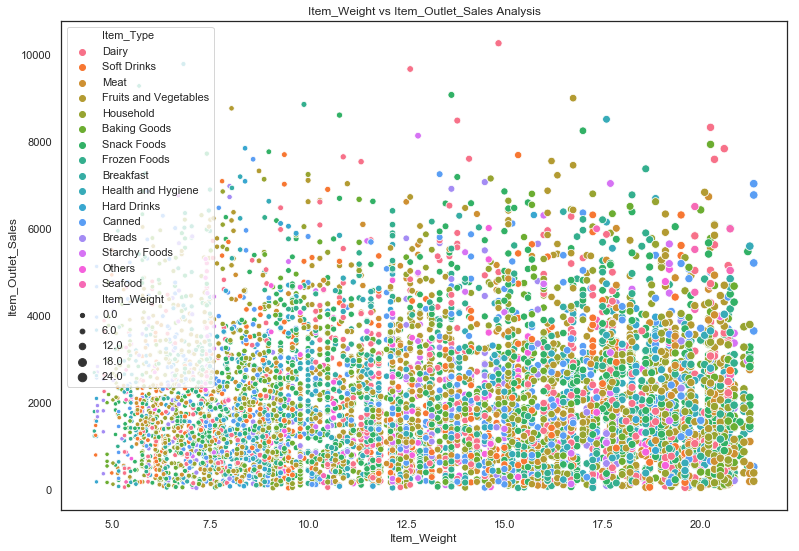

In [9]:
plt.figure(figsize=(13,9))
plt.xlabel("Item_Weight ")
plt.ylabel(" Item_Outlet_Sales")
plt.title("Item_Weight vs Item_Outlet_Sales Analysis")
sns.scatterplot(x="Item_Weight",y="Item_Outlet_Sales",hue="Item_Type",size="Item_Weight",data=df)

#### As the plots are random and scattered, so there is no good Co-rellation between Item_Weight vs Item_Outlet_Sales. Item Weight doesn't affect more on item sales

#### Check Co-rellation between Item_Visibility vs Item_Outlet_Sales

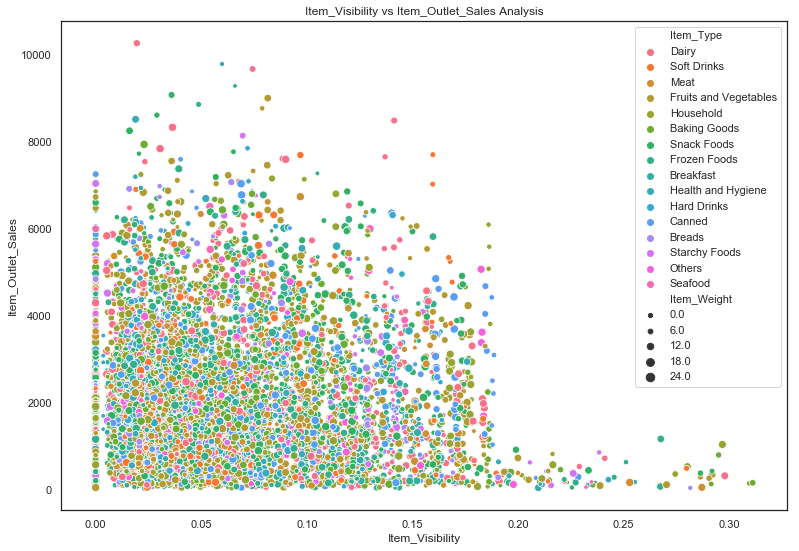

In [10]:
plt.figure(figsize=(13,9))
plt.xlabel("Item_Visibility")
plt.ylabel(" Item_Outlet_Sales")
plt.title("Item_Visibility vs Item_Outlet_Sales Analysis")
sns.scatterplot(x="Item_Visibility",y="Item_Outlet_Sales",hue="Item_Type",size="Item_Weight",data=df)

#### From the above plot, most of the items are clustered within 0.15 visibility. As per the data, lower the visibility more the sales. This might be due to the fact that a great number of daily use products, which do not need high visibility

#### Check the co-rellation between Item_Visibility vs Item_MRP

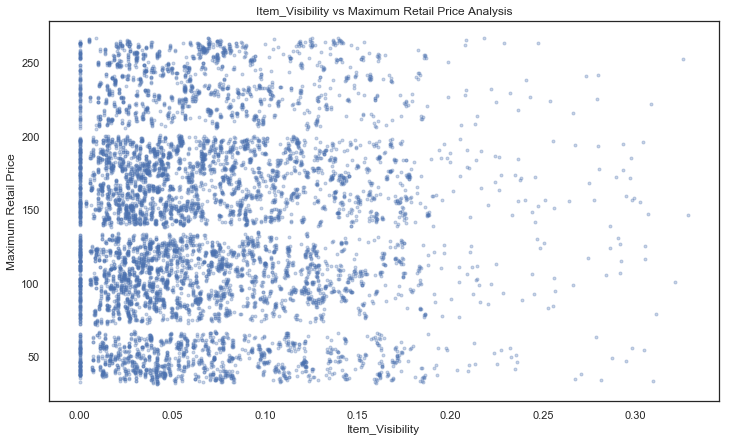

In [11]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Maximum Retail Price")
plt.title("Item_Visibility vs Maximum Retail Price Analysis")
plt.plot(df.Item_Visibility,df.Item_MRP,".", alpha=0.3)

#### Above graph tells, less visible items are having Maximum Retail Price 

#### Outlet_Establishment_Year and Item_Outlet_Sales analysis

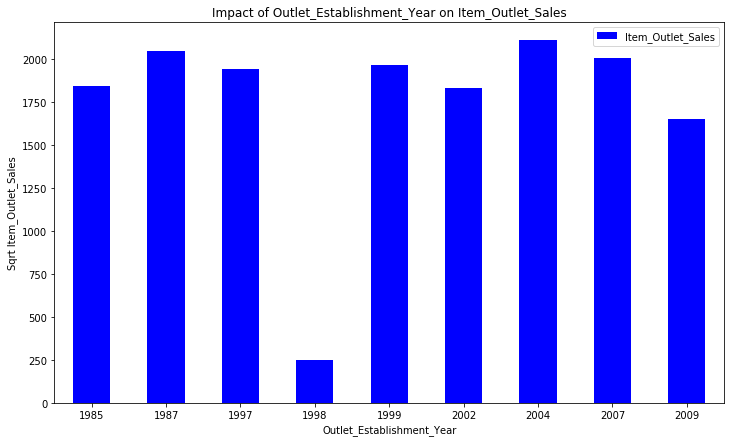

In [18]:
Outlet_Establishment_Year_pivot = \
df.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

#### There seems to be no significant meaning between the year of store establishment and the sales for the items. 1998 has low values but thet might be due to the fact the few stores opened in that year.

#### Item_Type and Item_Visibility Analysis

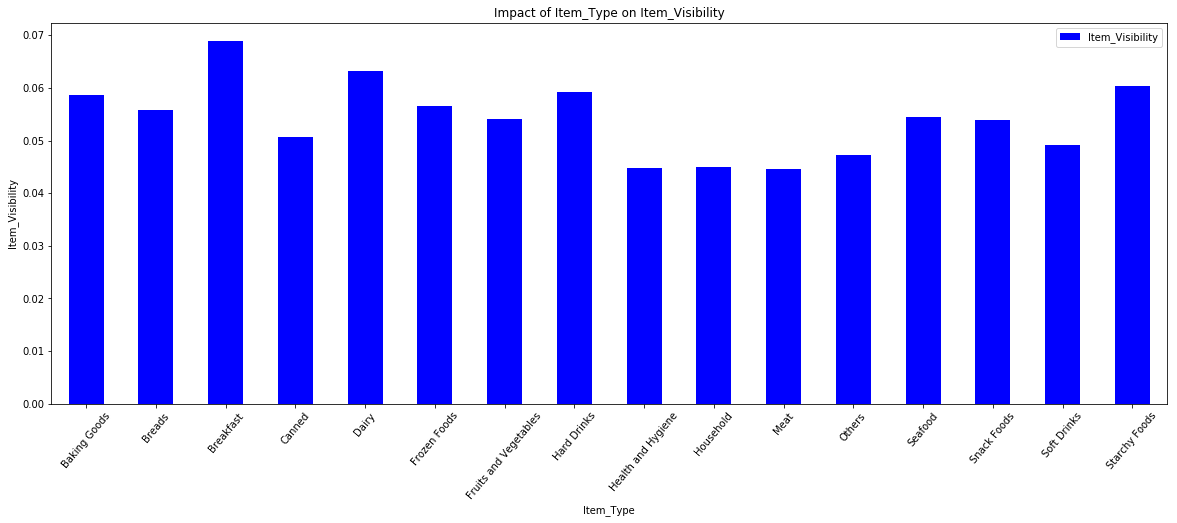

In [22]:
Outlet_Establishment_Year_pivot = \
df.pivot_table(index='Item_Type', values="Item_Visibility", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(20,7))
plt.xlabel("Item_Type")
plt.ylabel("Item_Visibility")
plt.title("Impact of Item_Type on Item_Visibility")
plt.xticks(rotation=50)
plt.show()

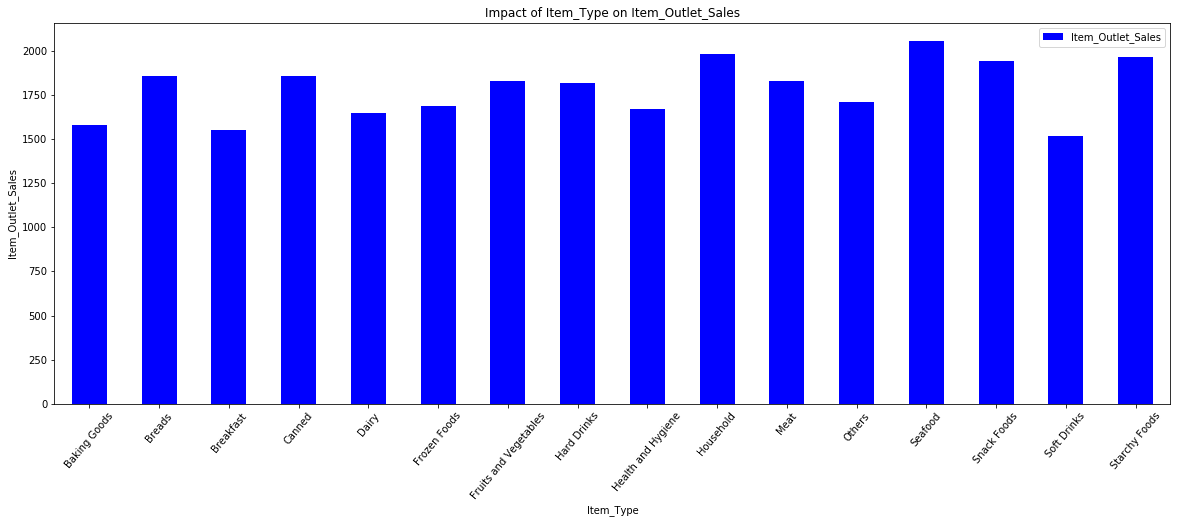

In [23]:
Outlet_Establishment_Year_pivot = \
df.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(20,7))
plt.xlabel("Item_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Type on Item_Outlet_Sales")
plt.xticks(rotation=50)
plt.show()

### Bivariate Analysis for Categorical Variables

#### Impact of Outlet_Identifier on Item_Outlet_Sales

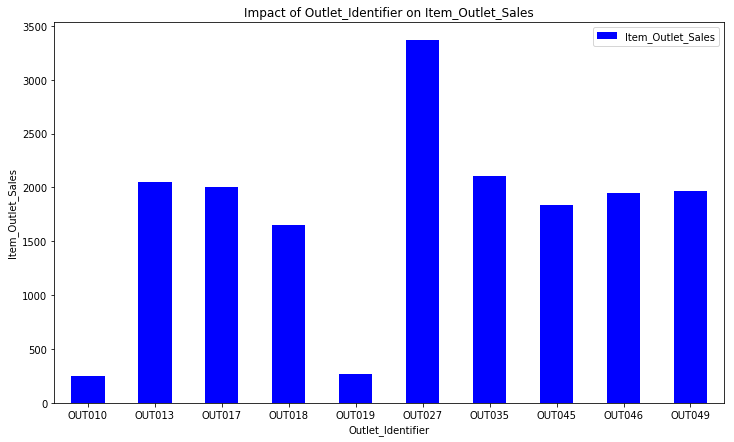

In [26]:
Outlet_Identifier_pivot = \
df.pivot_table(index="Outlet_Identifier", values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

#### we see that thr groceries (“OUT010”, “OUT019”) have the lowest sales results which is expected followed by the Supermarket Type 2 (“OUT018”). The best results belong to “Out027” which is a “Medium” size Supermarket Type 3.

#### Impact of Outlet_Type on Item_Outlet_Sales

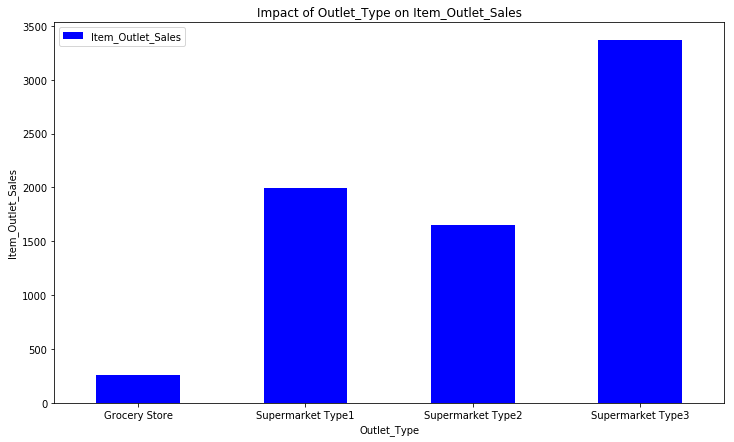

In [39]:
Outlet_Type_pivot = \
df.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

### Step 3: Feature Engineering
#### Check Co-rellation between the features

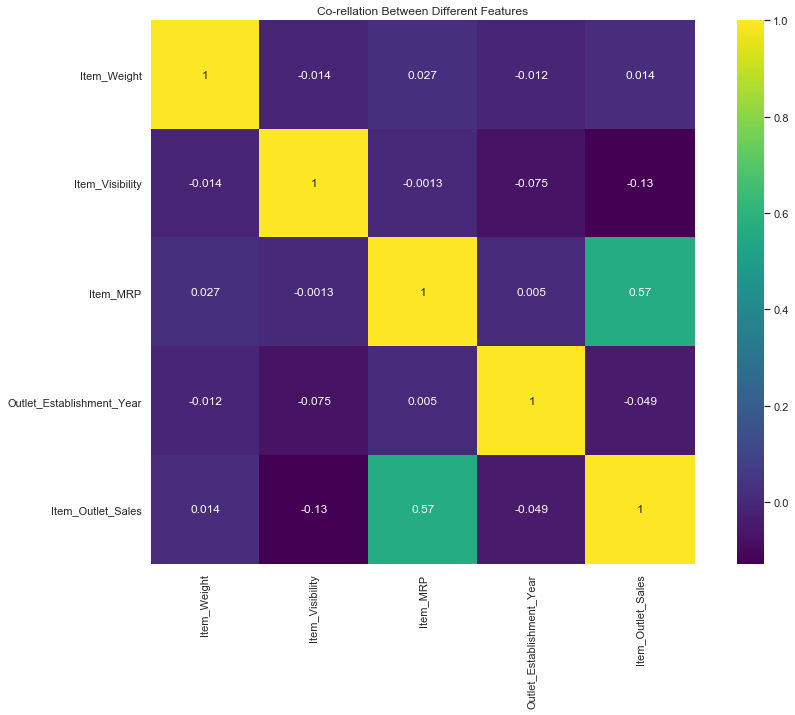

In [19]:
#Correlation map to see how features are correlated with Item Outlet Sales
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Co-rellation Between Different Features")
plt.show()

In [17]:
# Lets see correlation b/w target and features
corr_matrix=df.corr()
corr_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

#### Item_Visibility is the feature with the lowest correlation with our target variable. Therefore, the less visible the product is in the store the higher the price will be. ITEM_MRP seems to have a good correlation with targeted ITEM_OUTLET_SALES and other columns are not very useful for prediction of target value

In [ ]:
## Above co-rrelation matrix says there is good relationship between Item_MRP and Item_Outlet_Sales
## Since ITEM_WEIGHT column correlation strength is very low so we can drop it

### Missing Value Treatments

In [133]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Item_Weight contains 1463 no. of missing values. As Item_Weight is approxmately Normally Distributed and there is no outliers so we can use the mean of this column for missing value treatment. 

In [134]:
df['Item_Weight'].mean()

12.857645184136183

In [135]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

#### For Outlet_Size the missing will be treated as mode, medium size outlets are more 

In [136]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [137]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Now there is no Null or missing values

#### Treat Item_Visibility Feature. There are many zeros for item_Visiblity which not possible, all the items needs to be visible to the customers. 

In [138]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

526

In [139]:
df['Item_Visibility'] = df['Item_Visibility'].replace(0.000000,np.nan)#first fill by nam for simplicity
df['Item_Visibility'].fillna(df['Item_Visibility'].median(),inplace=True)

In [140]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

0

#### Determine the years of operation of a store

#### The outlet i established from 1985 to 2009. 

In [141]:
df.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [142]:
# We are subtracting from 2010 to get yeas of establishment
df['Outlet_Years'] = 2010 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    8523.000000
mean       12.168133
std         8.371760
min         1.000000
25%         6.000000
50%        11.000000
75%        23.000000
max        25.000000
Name: Outlet_Years, dtype: float64

#### Create a broad category of Item_Type

#### Item_Type variable has 16 categories which might not prove to be very useful in our analysis. So it’s a good idea to combine them. If we look closely to the Item_Identifier of each item we see that each one starts with either “FD” (Food), “DR” (Drinks) or “NC” (Non-Consumables). Therefore, we can group the items within these 3 categories

In [143]:
#Get the first two characters of ID:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

#### there were some non-consumables as well and a fat-content should not be specified for them. So we can also create a separate category for such kind of observations.

In [144]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [145]:
#Mark non-consumables as separate category in low_fat:
df.loc[df['Item_Type_Combined']=="Non-Consumable","Item_Fat_Content"] = "Non-Edible"

In [146]:
df.Item_Fat_Content.value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

#### Creating variable Item_Visibility_Avg

#### we hypothesized that products with higher visibility are likely to sell more. But along with comparing products on absolute terms, we should look at the visibility of the product in that particular store as compared to the mean visibility of that product across all stores. This will give some idea about how much importance was given to that product in a store as compared to other stores. We can use the ‘visibility_avg’ variable made above to achieve this.

In [147]:
Item_Visibility_Avg = df.pivot_table(values="Item_Visibility", index="Item_Identifier")
Item_Visibility_Avg

,Item_Visibility
Item_Identifier,
DRA12,0.051220
DRA24,0.048062
DRA59,0.141942
DRB01,0.082126
DRB13,0.008002
DRB24,0.020624
DRB25,0.077305
DRB48,0.031956
DRC01,0.019219


In [108]:
func = lambda x: x['Item_Visibility']/Item_Visibility_Avg['Item_Visibility'][Item_Visibility_Avg.index == x['Item_Identifier']][0]
df['Item_Visibility_MeanRatio'] = df.apply(func,axis=1).astype(float)
df['Item_Visibility_MeanRatio'].describe()

count    8523.000000
mean        1.000000
std         0.348957
min         0.000000
25%         0.892715
50%         0.998970
75%         1.055863
max         2.729420
Name: Item_Visibility_MeanRatio, dtype: float64

In [148]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,11,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,11,Food
3,FDX07,19.20,Regular,0.057792,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,12,Food
4,NCD19,8.93,Non-Edible,0.057792,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,23,Non-Consumable


### Step 4: Feature Transformation
#### Categorical Variables — One Hot Encoding

#### Since scikit-learn only accepts numerical variables, we need to convert all categories of nominal variables into numeric types. Let’s start with turning all categorical variables into numerical values using LabelEncoder() (Encode labels with value between 0 and n_classes-1). After that, we can use get_dummies to generate dummy variables from these numerical categorical variables

In [150]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']

In [152]:
for i in var_mod:
    df[i] = le.fit_transform(df[i])

#### One-Hot-Coding refers to creating dummy variables, one for each category of a categorical variable. For example, the Item_Fat_Content has 3 categories — LowFat,Regular,Non-Edible. One hot coding will remove this variable and generate 3 new variables. Each will have binary numbers — 0 (if the category is not present) and 1(if category is present). This can be done using get_dummies function of Pandas.

In [153]:
#Dummy Variables:
df = pd.get_dummies(df, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

In [155]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,11,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,1,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,11,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.057792,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,12,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.057792,Household,53.8614,OUT013,1987,994.7052,23,0,...,0,1,0,0,0,0,0,0,0,0


#### Here we can see that all variables are now float and each category has a new variable. Lets look at the 3 columns formed from Item_Fat_Content.

In [156]:
df[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


#### You can notice that each row will have only one of the columns as 1 corresponding to the category in the original variable.

In [157]:
#Drop the columns which have been converted to different types:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

### Split Data into Training and Testing set

In [163]:
X = df.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier', 'Item_Weight'],axis=1)

In [165]:
Y = df['Item_Outlet_Sales']

#### Splitting the dataset into 80 and 20 ratio. *0% data will be used for training the model and remaining 20% of the data will be used for evaluating the model

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [272]:
print("Shape of training Data is {}".format(X_train.shape))

Shape of training Data is (6818, 29)


In [273]:
print("Shape of test Data is {}".format(X_test.shape))

Shape of test Data is (1705, 29)


### Step 5: Modeling
### Linear Regression Model

In [183]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [185]:
lr_pred = lr.predict(X_test)

#### Check the difference between the actual value and predicted value.

In [189]:
finaldf = pd.DataFrame({'Actual': Y_test, 'Predicted': lr_pred})
df1 = finaldf.head(25)
finaldf.head(20)

,Actual,Predicted
7503,1743.0644,1600.0
2957,356.8688,592.0
7031,377.5086,944.0
1084,5778.4782,4080.0
856,2356.9320,3312.0
4304,865.5400,720.0
2132,4613.9940,4688.0
1385,2410.8618,2064.0
5239,1948.1308,1488.0
6516,1937.4780,2704.0


#### Now let's plot the comparison of Actual and Predicted values

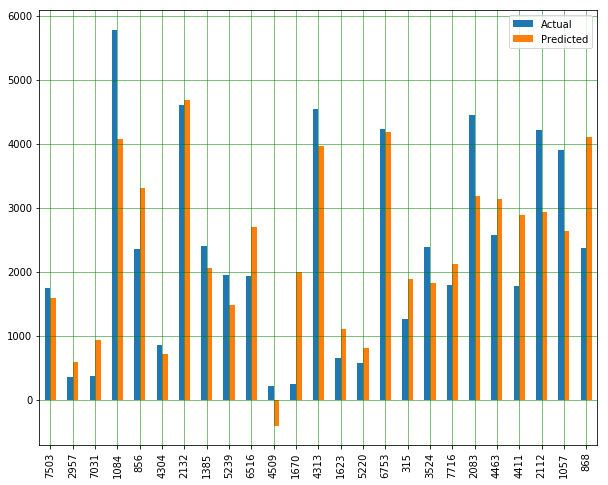

In [190]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


#### The final step is to evaluate the performance of the algorithm. We’ll do this by finding the values for MAE, MSE, and RMSE. Execute the following script:

In [281]:
from sklearn import metrics
lr_rmse = np.sqrt(metrics.mean_squared_error(Y_test, lr_pred))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(Y_test, lr_pred),2))  
print('Mean Squared Error:', round(metrics.mean_squared_error(Y_test, lr_pred),2))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(Y_test, lr_pred)),2))

Mean Absolute Error: 799.11
Mean Squared Error: 1152504.82
Root Mean Squared Error: 1073.55


In [284]:
lr_accuracy = lr.score(X_train,Y_train)
print("Linear Model Accuracy is ", round(lr_accuracy*100,2),'%')

Linear Model Accuracy is  55.61 %


In [286]:
# R squared value
print("R squared value is  " , metrics.explained_variance_score(Y_test, lr_pred))

R squared value is   0.576403636785619


In [255]:
# calculating coefficients
coeff = pd.DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = pd.Series(lr.coef_)
coeff

,0,Coefficient Estimate
0,Item_Visibility,-2.647301e+02
1,Item_MRP,1.556658e+01
2,Outlet_Years,-1.755642e+15
3,Item_Fat_Content_0,-5.026918e+15
4,Item_Fat_Content_1,1.663645e+16
5,Item_Fat_Content_2,-5.026918e+15
6,Outlet_Location_Type_0,-6.139972e+15
7,Outlet_Location_Type_1,1.523834e+16
8,Outlet_Location_Type_2,-1.804090e+16
9,Outlet_Size_0,9.229778e+16


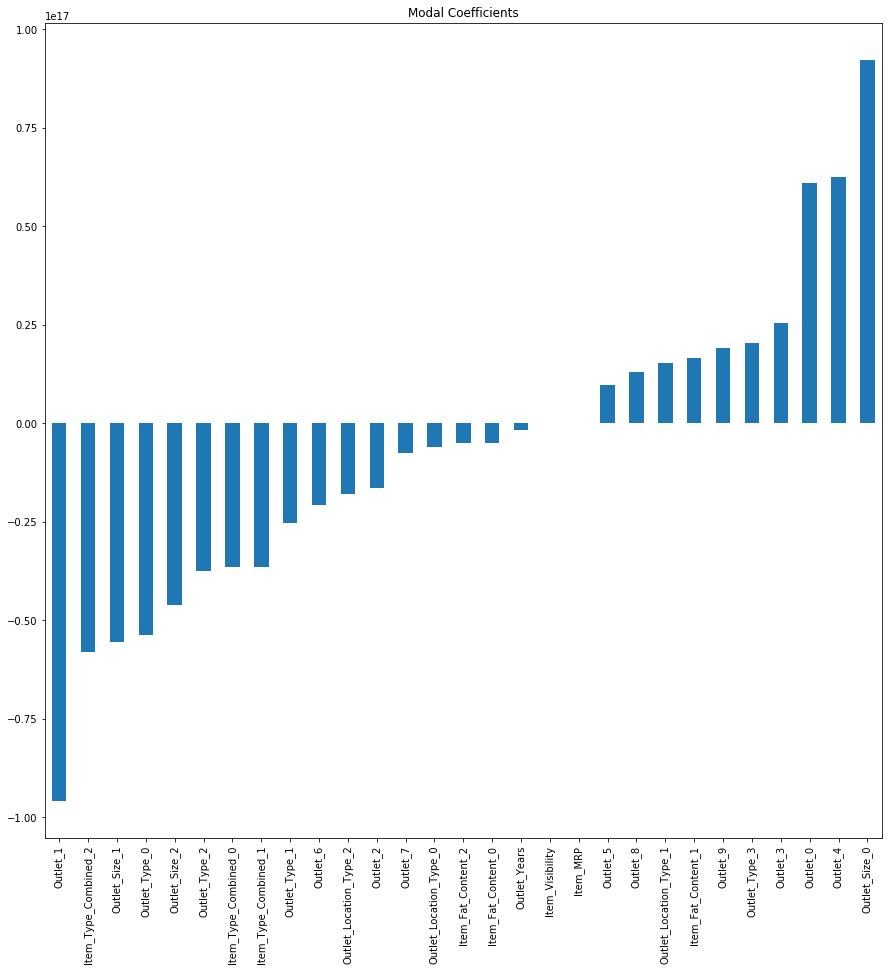

In [261]:
#checking the magnitude of coefficients
predictors = X_train.columns
coef = pd.Series(lr.coef_,predictors).sort_values()
plt.figure(figsize=(15,15))
coef.plot(kind='bar', title='Modal Coefficients')

### Ridge Regression

In [287]:
from sklearn.linear_model import Ridge
## training the model
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train,Y_train)
rr_pred = ridgeReg.predict(X_test)
rr_rmse = np.sqrt(metrics.mean_squared_error(Y_test, rr_pred))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(Y_test, rr_pred),2))  
print('Mean Squared Error:', round(metrics.mean_squared_error(Y_test, rr_pred),2))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(Y_test, rr_pred)),2))

Mean Absolute Error: 790.0
Mean Squared Error: 1138462.53
Root Mean Squared Error: 1066.99


In [290]:
## calculating score 
rr_accuracy = ridgeReg.score(X_train,Y_train)
print("Ridge Regression Model Accuracy is ", round(rr_accuracy*100,2),'%')

Ridge Regression Model Accuracy is  55.8 %


### Lasso regression

#### LASSO (Least Absolute Shrinkage Selector Operator), is quite similar to ridge, but lets understand the difference them by implementing it in our big mart problem.

In [291]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(X_train,Y_train)
la_pred = lassoReg.predict(X_test)

la_rmse = np.sqrt(metrics.mean_squared_error(Y_test, rr_pred))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(Y_test, la_pred),2))  
print('Mean Squared Error:', round(metrics.mean_squared_error(Y_test, la_pred),2))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(Y_test, la_pred)),2))

Mean Absolute Error: 789.6
Mean Squared Error: 1139964.24
Root Mean Squared Error: 1067.69


In [292]:
## calculating score 
la_accuracy = lassoReg.score(X_test,Y_test)
print("Lasso Regression Model Accuracy is ", round(la_accuracy*100,2),'%')

Lasso Regression Model Accuracy is  58.06 %


#### So, we can see that there is a slight improvement in our model because the value of the R-Square has been increased. Note that value of alpha, which is hyperparameter of Ridge, which means that they are not automatically learned by the model instead they have to be set manually.

### RandomForestRegressor

In [307]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)
rf.fit(X_train,Y_train)
rf_pred =rf.predict(X_test)

In [308]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rf_rmse = np.sqrt(metrics.mean_squared_error(Y_test, rf_pred))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(Y_test, rf_pred),2))  
print('Mean Squared Error:', round(metrics.mean_squared_error(Y_test, rf_pred),2))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(Y_test, rf_pred)),2))

Mean Absolute Error: 714.5
Mean Squared Error: 1034351.53
Root Mean Squared Error: 1017.03


In [309]:
rf_accuracy = rf.score(X_train,Y_train)
print("Random Forest model accuracy is  ", round(rf_accuracy*100,2),'%')

Random Forest model accuracy is   60.21 %


### DecisionTreeRegression

In [298]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=6,min_samples_leaf=100)
dt.fit(X_train,Y_train)
dt_pred = dt.predict(X_test)

In [299]:
dt_rmse = np.sqrt(metrics.mean_squared_error(Y_test, dt_pred))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(Y_test, dt_pred),2))  
print('Mean Squared Error:', round(metrics.mean_squared_error(Y_test, dt_pred),2))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(Y_test, dt_pred)),2))

Mean Absolute Error: 720.59
Mean Squared Error: 1059092.47
Root Mean Squared Error: 1029.12


In [300]:
dt_accuracy = dt.score(X_test,Y_test)
print("Decision Tree Model Accuracy is " , dt_accuracy*100,'%')

Decision Tree Model Accuracy is  61.03369632883313 %


### XGBoost Regressior

In [230]:
from xgboost import XGBRegressor

In [231]:
XGB = XGBRegressor(n_estimators=1000,learning_rate=0.05)
XGB.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [232]:
XGB_pred = XGB.predict(X_test)

In [310]:
xgb_rmse = np.sqrt(metrics.mean_squared_error(Y_test, XGB_pred))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(Y_test, XGB_pred),2))  
print('Mean Squared Error:', round(metrics.mean_squared_error(Y_test, XGB_pred),2))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(Y_test, XGB_pred)),2))

Mean Absolute Error: 768.37
Mean Squared Error: 1187342.18
Root Mean Squared Error: 1089.65


In [311]:
XGB_accuracy = XGB.score(X_train,Y_train)
print("XGBoost Model Accuracy is ",round(XGB_accuracy*100,2),'%')

XGBoost Model Accuracy is  87.57 %


### Step 7: Check Model Accuracy

In [317]:
rmse = {'Linear Regression': round(lr_rmse,2),
        'Ridge Regression' : round(rr_rmse,2),
        'Lasso Regression' : round(la_rmse,2),
        'Decision Tree' : round(dt_rmse,2),
        'Random Forest' : round(rf_rmse,2),
        'XGBoost Model' : round(xgb_rmse,2)}

In [323]:
from pandas import DataFrame

df_rmse = DataFrame(list(rmse.items()),columns = ['Models','RMSE'])

print (df_rmse)

              Models     RMSE
0  Linear Regression  1073.55
1   Ridge Regression  1066.99
2   Lasso Regression  1066.99
3      Decision Tree  1029.12
4      Random Forest  1017.03
5      XGBoost Model  1089.65


#### From the Above models Random Forest having less RMSE(Root Mean Square Error) value

In [324]:
rfdf = pd.DataFrame({'Actual': Y_test, 'Predicted': rf_pred})
df2 = rfdf.head(25)
df2.head(25)

,Actual,Predicted
7503,1743.0644,1402.342830
2957,356.8688,724.821390
7031,377.5086,695.080867
1084,5778.4782,4517.620041
856,2356.9320,3150.910140
4304,865.5400,633.457818
2132,4613.9940,5788.313425
1385,2410.8618,2074.720280
5239,1948.1308,1638.476386
6516,1937.4780,2991.895178


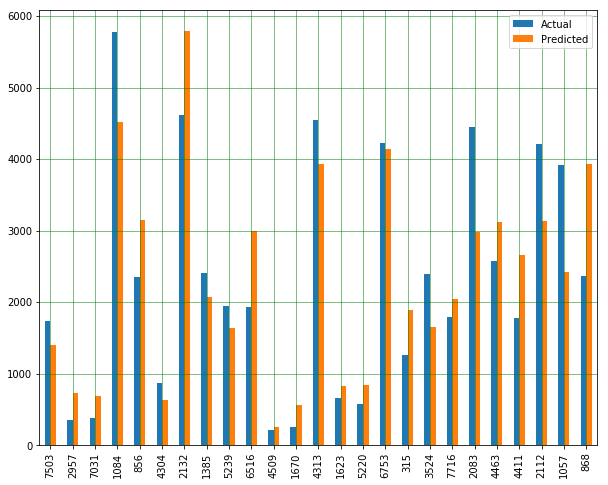

In [325]:
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Conclusion :

#### Random Forest Model is comparatively performed better among all other model.